<a href="https://colab.research.google.com/github/123hawaa/Automate-the-Boring-Stuff-with-Python/blob/master/Chapter_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DICTIONARIES AND STRUCTURING DATA
Like a list, a dictionary is a mutable collection of many values. But unlike indexes for lists, indexes for dictionaries can use many different data types, not just integers. These dictionary indexes are called **keys**, and a key with its associated value is called a **key-value** pair.



In [ ]:
cat = {'name':'Tom','color': 'black','age' : 3}
print(cat)

{'name': 'Tom', 'color': 'black', 'age': 3}


In [ ]:
cat['color']

'black'

In [ ]:
cat['name']

'Tom'

In [ ]:
#Dictionaries can still use integer values as keys, just like lists use integers for indexes, but they don’t have to start at 0 and can be any number
spam = {22:'LCO',3:'this is number 3'}

In [ ]:
spam[22]

'LCO'

In [ ]:
spam[3]

'this is number 3'

Dictionaries have keys, not indexes. In this example, while the dictionary in spam has integer keys 22 and 3, it doesn’t have an index 0 through 41 like a list would.

# Comparing Dictionaries and Lists
Unlike lists, items in dictionaries are unordered. The first item in a list named spam would be spam[0]. But there is no “first” item in a dictionary. While the order of items matters for determining whether two lists are the same, you can enter the key-value pairs of a dictionary in any order.

In [ ]:
spam=['number','name','age']
spam_2 = ['name','number','age']
spam == spam_2

False

In [ ]:
dic = {'name':'jazi','age': 22, 'number':22}
dic_2 = {'age': 22, 'name':'jazi','number':22}
dic == dic_2
#Because a dictionary isn’t ordered, it isn’t a sequence data type

True

In [ ]:
#Say you wanted your program to store data about your friends’ birthdays. You can use a dictionary with the names as keys and the birthdays as values.
birthdays = {'hawaa':'Decmber', 'lolo':'April', 'Esraa':' june', 'MUstafa':'Sep'}
while True:
  print('input a name (blank to quit)')
  name  = input()
  if name == "" :
    break
  if name in birthdays :
    print(birthdays[name]+'  is birthday of ' + name)
  else :
    print('your name is not in dec')


input a name (blank to quit)
hawaa
Decmber  is birthday of hawaa
input a name (blank to quit)
Esraa
 june  is birthday of Esraa
input a name (blank to quit)



# Returning Keys and Values
Three dictionary methods will return list-like values of the dictionary’s keys, values, or both keys and values: **keys(), values(), and items()**.

In [ ]:
cat = {'name':'Tom','color': 'black','age' : 3}
cat.keys()

dict_keys(['name', 'color', 'age'])

In [ ]:
for i in cat.keys():
  print(i)

name
color
age


In [ ]:
cat.values()


dict_values(['Tom', 'black', 3])

In [ ]:
for i in cat.values():
  print(i)

Tom
black
3


In [ ]:
cat.items()

dict_items([('name', 'Tom'), ('color', 'black'), ('age', 3)])

In [ ]:
'Tom' in cat.values()

True

In [ ]:
'hawaa' in cat.values()

False

In [ ]:
'Tom' in cat.keys()

False

In [ ]:
#If you want to get an actual list from one of these methods, pass its list-like return value to the list() function
list(cat.keys())

['name', 'color', 'age']

#Checking Whether a Key Exists
Checking whether a key exists in a dictionary before accessing that key’s value , get() method that takes two arguments: the key of the value to retrieve and a fallback value

In [ ]:
item = {'Apple':4,'Orange':5}


In [ ]:
print('i have ' + str(item.get('Apple',0)) + ' Apples')

i have 4 Apples


In [ ]:
print('i have ' + str(item.get('Banana',0)) + ' Banana')

i have 0 Banana


Without using get(), the code would have caused an error message

# Setting Default Values
You’ll often have to set a value in a dictionary for a certain key only if that key doesn’t already have a value

In [ ]:
Info = {'name': 'Pooka', 'age': 5}
Info['color'] = 'Black'

In [ ]:
Info

{'name': 'Pooka', 'age': 5, 'color': 'Black'}

In [ ]:
Info.setdefault('friend','LOLO')

'LOLO'

In [ ]:
Info

{'name': 'Pooka', 'age': 5, 'color': 'Black', 'friend': 'LOLO'}

In [ ]:
Info.setdefault('friend','Hawaa')

'LOLO'

# Model Real-World Things Using Data Structures
In algebraic chess notation, the squares on the chessboard are identified by a number and letter coordinate,
We won’t create our own chess-playing program here. (That would require its own book!) But we can create an interactive chessboard program with what we’ve discussed so far.
You don’t need to know the rules of chess for this program.
*  Just know that chess is played on an 8×8 board with white and black pieces called pawns, knights, bishops, rooks, queens, and kings.
*   The upper-left and lower-right squares of the board should be white, and our program assumes the background of the output window is black (unlike the white background of a paper book).
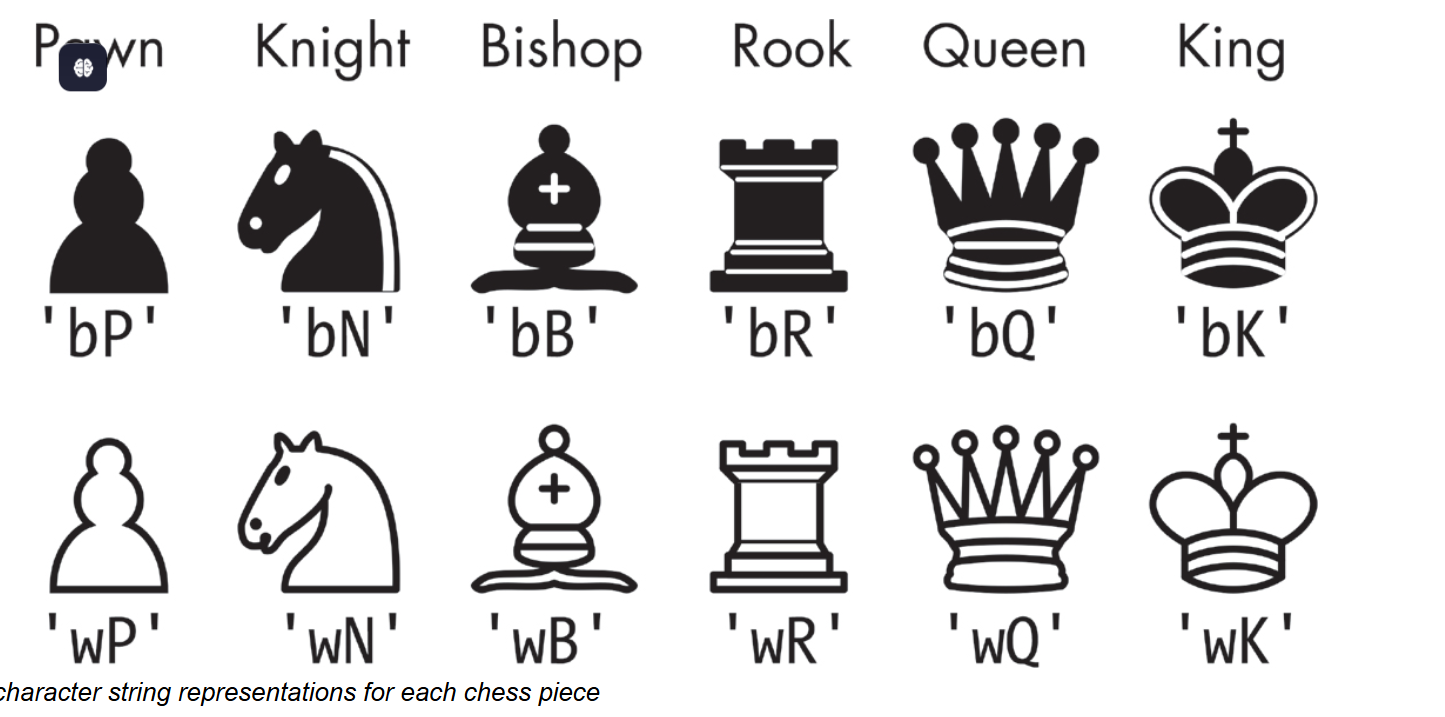

*  First, we need to design a data structure that can represent a chessboard and any possible configuration of pieces on it
*   the board is a Python dictionary with string keys 'a1' to 'h8' to represent squares on the board
*   Note that these strings are always two characters long. Also, the letter is always lowercase and comes before the number.
*   To represent the pieces, we’ll also use two-character strings, where the first letter is a lowercase 'w' or 'b' to indicate the white or black color, and the second letter is an uppercase 'P', 'N', 'B', 'R', 'Q', or 'K' to represent the kind of piece
*   The keys of the Python dictionary identify the squares of the board and the values identify the piece on that square.
*   keys in a dictionary can be used only once, and squares on a chessboard can have only one piece on them at a time.


# Step 1: Set Up the Program
At the start of the game, the white and black players have 16 pieces each. The STARTING_PIECES constant will hold a chessboard dictionary with all the proper pieces in their correct starting positions:



In [ ]:
import sys, copy

STARTING_PIECES = {'a8': 'bR', 'b8': 'bN', 'c8': 'bB', 'd8': 'bQ',
'e8': 'bK', 'f8': 'bB', 'g8': 'bN', 'h8': 'bR', 'a7': 'bP', 'b7': 'bP',
'c7': 'bP', 'd7': 'bP', 'e7': 'bP', 'f7': 'bP', 'g7': 'bP', 'h7': 'bP',
'a1': 'wR', 'b1': 'wN', 'c1': 'wB', 'd1': 'wQ', 'e1': 'wK', 'f1': 'wB',
'g1': 'wN', 'h1': 'wR', 'a2': 'wP', 'b2': 'wP', 'c2': 'wP', 'd2': 'wP',
'e2': 'wP', 'f2': 'wP', 'g2': 'wP', 'h2': 'wP'}

# Step 2: Create a Chessboard Template
* The BOARD_TEMPLATE variable will contain a string that acts as a template for a chessboard.
* By using three double-quote characters in a row, we can create a multiline string that spans several lines of code
*  The pairs of curly brackets represent places in the string where we’ll insert chess piece strings such as 'wR' or 'bQ'
*   If the square is empty, the program will insert the WHITE_SQUARE or BLACK_SQUARE string instead

In [ ]:
BOARD_TEMPLATE = """
    a    b    c    d    e    f    g    h
   ____ ____ ____ ____ ____ ____ ____ ____
  ||||||    ||||||    ||||||    ||||||    |
8 ||{}|| {} ||{}|| {} ||{}|| {} ||{}|| {} |
  ||||||____||||||____||||||____||||||____|
  |    ||||||    ||||||    ||||||    ||||||
7 | {} ||{}|| {} ||{}|| {} ||{}|| {} ||{}||
  |____||||||____||||||____||||||____||||||
  ||||||    ||||||    ||||||    ||||||    |
6 ||{}|| {} ||{}|| {} ||{}|| {} ||{}|| {} |
  ||||||____||||||____||||||____||||||____|
  |    ||||||    ||||||    ||||||    ||||||
5 | {} ||{}|| {} ||{}|| {} ||{}|| {} ||{}||
  |____||||||____||||||____||||||____||||||
  ||||||    ||||||    ||||||    ||||||    |
4 ||{}|| {} ||{}|| {} ||{}|| {} ||{}|| {} |
  ||||||____||||||____||||||____||||||____|
  |    ||||||    ||||||    ||||||    ||||||
3 | {} ||{}|| {} ||{}|| {} ||{}|| {} ||{}||
  |____||||||____||||||____||||||____||||||
  ||||||    ||||||    ||||||    ||||||    |
2 ||{}|| {} ||{}|| {} ||{}|| {} ||{}|| {} |
  ||||||____||||||____||||||____||||||____|
  |    ||||||    ||||||    ||||||    ||||||
1 | {} ||{}|| {} ||{}|| {} ||{}|| {} ||{}||
  |____||||||____||||||____||||||____||||||
"""
WHITE_SQUARE = '||'
BLACK_SQUARE = '  '

# Step 3: Print the Current Chessboard
We’ll define a print_chessboard() function that accepts the chessboard dictionary, then prints a chessboard on the screen that reflects the pieces on this board
*  There are 64 squares on a chessboard and 64 {} pairs in the BOARD_TEMPLATE string. We must build up a list of 64 strings to replace these {} pairs.
*  We store this list in the squares variable
*  The strings in this list represent either chess pieces, like 'wB' and 'bQ', or empty squares
*   We’ll use a Boolean value in the is_white_square variable to keep track of which squares are white and which are black.
*  The square in the upper left is a white square, so we’ll start is_white_square as True
*  

In [ ]:
def print_chessboard(board):
    squares = []
    is_white_square = True #The square in the upper left is a white square, so we’ll start is_white_square as True.
    for y in '87654321':
        for x in 'abcdefgh':
            if x + y in board.keys():
                squares.append(board[x + y])
            else:
                if is_white_square: #If there’s no piece, we add an empty square
                    squares.append(WHITE_SQUARE)
                else:
                    squares.append(BLACK_SQUARE)
            is_white_square = not is_white_square #After each square, we flip the color:
        is_white_square = not is_white_square #At the end of each row, we flip again.Why? Because on a chessboard, each row starts with the opposite color of the row above it.

    print(BOARD_TEMPLATE.format(*squares))
    #After the loops have finished, the squares list contains 64 strings.

# Step 4: Manipulate the Chessboard


In [ ]:
print('Interactive Chessboard')
print()
print('Pieces:')
print('  w - White, b - Black')
print('  P - Pawn, N - Knight, B - Bishop, R - Rook, Q - Queen, K - King')
print('Commands:')
print('  move e2 e4 - Moves the piece at e2 to e4')
print('  remove e2 - Removes the piece at e2')
print('  set e2 wP - Sets square e2 to a white pawn')
print('  reset - Resets pieces back to their starting squares')
print('  clear - Clears the entire board')
print('  fill wP - Fills entire board with white pawns.')
print('  quit - Quits the program')

Interactive Chessboard

Pieces:
  w - White, b - Black
  P - Pawn, N - Knight, B - Bishop, R - Rook, Q - Queen, K - King
Commands:
  move e2 e4 - Moves the piece at e2 to e4
  remove e2 - Removes the piece at e2
  set e2 wP - Sets square e2 to a white pawn
  reset - Resets pieces back to their starting squares
  clear - Clears the entire board
  fill wP - Fills entire board with white pawns.
  quit - Quits the program


In [ ]:
main_board = copy.copy(STARTING_PIECES)
while True:
    print_chessboard(main_board)
    response = input('> ').split()
    if response[0] == 'move':
        main_board[response[2]] = main_board[response[1]]
        del main_board[response[1]]
    elif response[0] == 'remove':
        del main_board[response[1]]
    elif response[0] == 'set':
        main_board[response[1]] = response[2]
    elif response[0] == 'reset':
        main_board = copy.copy(STARTING_PIECES)
    elif response[0] == 'clear':
        main_board = {}
    elif response[0] == 'quit':
        sys.exit()


    a    b    c    d    e    f    g    h
   ____ ____ ____ ____ ____ ____ ____ ____
  ||||||    ||||||    ||||||    ||||||    |
8 ||bR|| bN ||bB|| bQ ||bK|| bB ||bN|| bR |
  ||||||____||||||____||||||____||||||____|
  |    ||||||    ||||||    ||||||    ||||||
7 | bP ||bP|| bP ||bP|| bP ||bP|| bP ||bP||
  |____||||||____||||||____||||||____||||||
  ||||||    ||||||    ||||||    ||||||    |
6 ||||||    ||||||    ||||||    ||||||    |
  ||||||____||||||____||||||____||||||____|
  |    ||||||    ||||||    ||||||    ||||||
5 |    ||||||    ||||||    ||||||    ||||||
  |____||||||____||||||____||||||____||||||
  ||||||    ||||||    ||||||    ||||||    |
4 ||||||    ||||||    ||||||    ||||||    |
  ||||||____||||||____||||||____||||||____|
  |    ||||||    ||||||    ||||||    ||||||
3 |    ||||||    ||||||    ||||||    ||||||
  |____||||||____||||||____||||||____||||||
  ||||||    ||||||    ||||||    ||||||    |
2 ||wP|| wP ||wP|| wP ||wP|| wP ||wP|| wP |
  ||||||____||||||____||||||____|||